In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
import pandas as pd
#from sklearn.model_selection import train_test_split
#from sklearn.metrics import log_loss
#from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit
from os.path import join as opj
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pylab
plt.rcParams['figure.figsize'] = 10, 10


#Import Keras.
from matplotlib import pyplot
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Input, Flatten, Activation
from keras.layers import GlobalMaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.merge import Concatenate
from keras.models import Model
from keras import initializers
from keras.optimizers import Adam
from keras.optimizers import rmsprop
from keras.layers.advanced_activations import LeakyReLU, PReLU
from keras.optimizers import SGD
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping

from keras.datasets import cifar10
#Data Aug for multi-input
from keras.models import *
from keras.layers import *
from keras.applications import *
from keras.preprocessing.image import *
import h5py
import sys

Using TensorFlow backend.
/u/13/lix12/unix/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [6]:
train = pd.read_json('train.json')
target_train=train['is_iceberg']
test = pd.read_json('test.json')

In [50]:
train[:5]


,band_1,band_2,id,inc_angle,is_iceberg
0,"[-27.878360999999998, -27.15416, -28.668615, -...","[-27.154118, -29.537888, -31.0306, -32.190483,...",dfd5f913,43.9239,0
1,"[-12.242375, -14.920304999999999, -14.920363, ...","[-31.506321, -27.984554, -26.645678, -23.76760...",e25388fd,38.1562,0
2,"[-24.603676, -24.603714, -24.871029, -23.15277...","[-24.870956, -24.092632, -20.653963, -19.41104...",58b2aaa0,45.2859,1
3,"[-22.454607, -23.082819, -23.998013, -23.99805...","[-27.889421, -27.519794, -27.165262, -29.10350...",4cfc3a18,43.8306,0
4,"[-26.006956, -23.164886, -23.164886, -26.89116...","[-27.206915, -30.259186, -30.259186, -23.16495...",271f93f4,35.6256,0


In [3]:
test['id']

0       5941774d
1       4023181e
2       b20200e4
3       e7f018bb
4       4371c8c3
5       a8d9b1fd
6       29e7727e
7       92a51ffb
8       c769ac97
9       aee0547d
10      565b28ac
11      e04e9775
12      8e8161d1
13      4cf4d256
14      139e5324
15      f156976f
16      68a117cc
17      d9aa7a56
18      9005b143
19      5f6d3988
20      9ad70954
21      b9087b9e
22      a39a1427
23      82fbe8ed
24      1fae4879
25      6dd8f13d
26      bbad5958
27      54527583
28      be8fa29c
29      81a3328f
          ...   
8394    8ae30ce6
8395    de27ed88
8396    66d5196f
8397    d85f1858
8398    16dcb33a
8399    eca3158e
8400    08daeee6
8401    e9c513ee
8402    b1519fa6
8403    dfc89540
8404    8fd8c0e9
8405    45df6347
8406    bf7928d7
8407    7b587c05
8408    c2834388
8409    146143c3
8410    d59aee00
8411    cbc0b93b
8412    088e2ff7
8413    673d33cd
8414    674b031e
8415    43db4207
8416    156855e1
8417    ac96cfb0
8418    fe45aef5
8419    16ee9b50
8420    5a599eb7
8421    df30d6

In [51]:
#train.inc_angle
#train.inc_angle = train.inc_angle.apply(lambda x: np.nan if x == 'na' else x)
#train.inc_angle

0       43.9239
1       38.1562
2       45.2859
3       43.8306
4       35.6256
5       36.9034
6       34.4751
7       41.1769
8       35.7829
9       43.3007
10       44.624
11      39.5067
12      41.8544
13      45.2909
14      34.7715
15       43.782
16      45.3568
17      38.7812
18      42.5145
19      37.2802
20      41.7973
21      38.0669
22      39.6636
23      37.6866
24       40.296
25       39.234
26      40.3904
27      43.7895
28      42.5891
29      41.0303
         ...   
1574         na
1575         na
1576         na
1577         na
1578         na
1579         na
1580         na
1581         na
1582         na
1583         na
1584         na
1585         na
1586         na
1587         na
1588         na
1589         na
1590         na
1591         na
1592         na
1593         na
1594         na
1595         na
1596         na
1597         na
1598         na
1599         na
1600         na
1601         na
1602         na
1603         na
Name: inc_angle, Length:

In [4]:
train.inc_angle = train.inc_angle.apply(lambda x: np.nan if x == 'na' else x)
test.inc_angle = test.inc_angle.apply(lambda x: np.nan if x == 'na' else x)

In [5]:
img1 = train.loc[0,['band_1','band_2']]
img1

band_1    [-27.878360999999998, -27.15416, -28.668615, -...
band_2    [-27.154118, -29.537888, -31.0306, -32.190483,...
Name: 0, dtype: object

In [7]:
np.array(img1['band_1']).reshape(75,75)

array([[-27.878361, -27.15416 , -28.668615, ..., -25.573483, -26.488674,
        -30.507013],
       [-28.66853 , -27.878401, -27.508776, ..., -26.488632, -28.671562,
        -31.594166],
       [-28.66853 , -27.15416 , -25.865042, ..., -27.157106, -27.881393,
        -32.837124],
       ..., 
       [-29.092905, -28.669163, -30.504612, ..., -30.011005, -25.868538,
        -26.489265],
       [-31.591682, -27.878992, -28.669205, ..., -27.512272, -26.817074,
        -27.512358],
       [-29.092905, -26.814081, -27.154791, ..., -26.817032, -27.881983,
        -28.268127]])

In [8]:
np.array(img1['band_2']).reshape(75,75)

array([[-27.154118, -29.537888, -31.0306  , ..., -29.095308, -29.540878,
        -27.511766],
       [-31.030518, -33.529335, -31.591175, ..., -34.288055, -28.267496,
        -26.488716],
       [-33.529289, -37.051159, -31.591175, ..., -31.594084, -32.19339 ,
        -29.54092 ],
       ..., 
       [-27.87895 , -27.878992, -30.008141, ..., -25.289221, -27.512272,
        -28.672153],
       [-29.538437, -29.538477, -29.092991, ..., -28.672112, -28.268087,
        -33.532959],
       [-30.008057, -28.669163, -27.509365, ..., -30.507519, -28.672153,
        -29.095982]])

In [9]:
img1 = np.stack([img1['band_1'], img1['band_2']],-1).reshape(75,75,2)
img1

array([[[-27.878361, -27.154118],
        [-27.15416 , -29.537888],
        [-28.668615, -31.0306  ],
        ..., 
        [-25.573483, -29.095308],
        [-26.488674, -29.540878],
        [-30.507013, -27.511766]],

       [[-28.66853 , -31.030518],
        [-27.878401, -33.529335],
        [-27.508776, -31.591175],
        ..., 
        [-26.488632, -34.288055],
        [-28.671562, -28.267496],
        [-31.594166, -26.488716]],

       [[-28.66853 , -33.529289],
        [-27.15416 , -37.051159],
        [-25.865042, -31.591175],
        ..., 
        [-27.157106, -31.594084],
        [-27.881393, -32.19339 ],
        [-32.837124, -29.54092 ]],

       ..., 
       [[-29.092905, -27.87895 ],
        [-28.669163, -27.878992],
        [-30.504612, -30.008141],
        ..., 
        [-30.011005, -25.289221],
        [-25.868538, -27.512272],
        [-26.489265, -28.672153]],

       [[-31.591682, -29.538437],
        [-27.878992, -29.538477],
        [-28.669205, -29.092991],
     

In [10]:
plt.imshow(img1[:,:,1])

In [11]:
def color_composite(data):
    rgb_arrays = []
    for i, row in data.iterrows():
        band_1 = np.array(row['band_1']).reshape(75, 75)
        band_2 = np.array(row['band_2']).reshape(75, 75)
        band_3 = band_1 / band_2

        r = (band_1 + abs(band_1.min())) / np.max((band_1 + abs(band_1.min())))
        g = (band_2 + abs(band_2.min())) / np.max((band_2 + abs(band_2.min())))
        b = (band_3 + abs(band_3.min())) / np.max((band_3 + abs(band_3.min())))
        
#         r = ((band_1 - np.mean(band_1)) / (np.max(band_1) - np.min(band_1))) 
#         g = ((band_2 - np.mean(band_2)) / (np.max(band_2) - np.min(band_2))) 
#         b = ((band_3 - np.mean(band_3)) / (np.max(band_3) - np.min(band_3)))

        rgb = np.dstack((r, g, b))
        rgb_arrays.append(rgb)
    return np.array(rgb_arrays)

In [12]:
# Trained with data about rgb
rgb_train = color_composite(train)
rgb_train.shape

(1604, 75, 75, 3)

In [22]:
# Test with data about rgb
rgb_test = color_composite(test)
#rgb_test = np.stack(test['id'],rgb_test)
rgb_test.shape

(8424, 75, 75, 3)

Looking at random ships


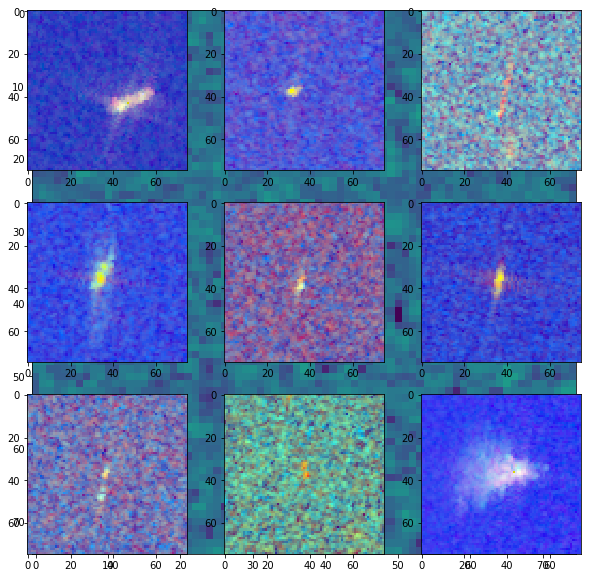

In [14]:
# look at random ships
print('Looking at random ships')
ships = np.random.choice(np.where(train.is_iceberg ==0)[0], 9)
fig = plt.figure(1,figsize=(12,12))
for i in range(9):
    ax = fig.add_subplot(3,3,i+1)
    arr = rgb_train[ships[i], :, :]
    ax.imshow(arr)
    
plt.show()

Looking at random icebergs


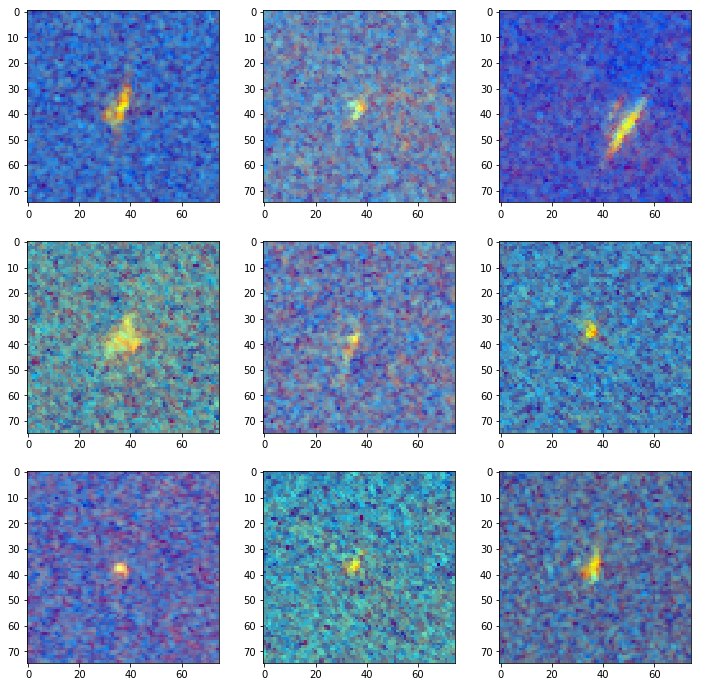

In [15]:
# look at random iceberges
print('Looking at random icebergs')
ice = np.random.choice(np.where(train.is_iceberg ==1)[0], 9)
fig = plt.figure(200,figsize=(12,12))
for i in range(9):
    ax = fig.add_subplot(3,3,i+1)
    arr = rgb_train[ice[i], :, :]
    ax.imshow(arr)
    
plt.show()

In [40]:
gen = ImageDataGenerator(horizontal_flip = True,
                         vertical_flip = True,
                         width_shift_range = 0.,
                         height_shift_range = 0.,
                         channel_shift_range=0,
                         zoom_range = 0.2,
                         rotation_range = 10)


In [4]:
def gen_flow(X1, y):
    genX1 = gen.flow(X1,y)
    while True:
            X1i = genX1.next()
            #Assert arrays are equal - this was for peace of mind, but slows down training
            #np.testing.assert_array_equal(X1i[0],X2i[0])
#gen_train = gen_flow(rgb_train,train.is_iceberg)

In [16]:
# # making directories for training resnet (as it need files to be in right dir)

os.makedirs(f'composites', exist_ok= True)
os.makedirs(f'composites/train', exist_ok=True)
os.makedirs(f'composites/test2/test', exist_ok=True)

dir_list = [f'composites/train']
train_list_name = train['id']

In [17]:
for i in dir_list:
    os.makedirs(f'{i}/ship')
    os.makedirs(f'{i}/iceberg')

In [24]:
train_y = train.is_iceberg
train_iceberg_index = train_y[train_y==1].index
train_ship_index = train_y[train_y==0].index
#save train images
for idx in train_iceberg_index:
    img = rgb_train[idx]
    plt.imsave(f'composites/train/iceberg/' + str(idx) + '.png',  img)
for idx in train_ship_index:
    img = rgb_train[idx]
    plt.imsave(f'composites/train/ship/' + str(idx) + '.png',  img)  

In [32]:
#print(test['id'][1])
for idx in range(len(test)):
    img = rgb_test[idx]
    plt.imsave(f'composites/test2/test/' + str(test['id'][idx]) + '.png',  img)  

In [7]:
def write_gap(MODEL, image_size, lambda_func=None):
    width = image_size[0]
    height = image_size[1]
    input_tensor = Input((height, width, 3))
    x = input_tensor
    if lambda_func:
        x = Lambda(lambda_func)(x)
    
    base_model = MODEL(input_tensor=x, weights='imagenet', include_top=False)
    model = Model(base_model.input, GlobalAveragePooling2D()(base_model.output))
    gen = ImageDataGenerator()
    train_generator = gen.flow_from_directory("composites/train", image_size, shuffle=False, 
                                              batch_size=16)
    test_generator = gen.flow_from_directory("composites/test2", image_size, shuffle=False, 
                                             batch_size=16, class_mode=None)
    train = model.predict_generator(train_generator, train_generator.samples/16)
    test = model.predict_generator(test_generator, test_generator.samples/16)
    with h5py.File("gap_%s.h5"%MODEL.__name__) as h:
        h.create_dataset("train", data=train)
        h.create_dataset("test", data=test)
        h.create_dataset("is_iceberg", data=train_generator.classes)


In [52]:
tr_img = gen.flow_from_directory('composites/train1',batch_size=1,
                                 shuffle = False,
                                 save_to_dir='composites/train1/iceberg',
                                 save_prefix='gen')
for i in range(4000):
    tr_img.next()

Found 753 images belonging to 1 classes.


In [53]:
tr_ship = gen.flow_from_directory('composites/train2',batch_size=1,
                                 shuffle = False,
                                 save_to_dir='composites/train2/ship',
                                 save_prefix='gen')
for i in range(4000):
    tr_ship.next()

Found 851 images belonging to 1 classes.


In [57]:

write_gap(ResNet50, (224, 224))

Found 9604 images belonging to 2 classes.
Found 8424 images belonging to 1 classes.


In [8]:
write_gap(InceptionV3, (299, 299), inception_v3.preprocess_input)


Found 9604 images belonging to 2 classes.
Found 8424 images belonging to 1 classes.


In [34]:
h = h5py.File('gap_ResNet50.h5','r')

In [36]:
h['train']

<HDF5 dataset "train": shape (1604, 2048), type "<f4">

In [9]:
write_gap(Xception, (299, 299), xception.preprocess_input)

Found 9604 images belonging to 2 classes.
Found 8424 images belonging to 1 classes.


In [11]:
write_gap(VGG19, (224, 224))

80142336/80134624 [==============================] - 5s 0us/step
Found 9604 images belonging to 2 classes.
Found 8424 images belonging to 1 classes.


In [39]:
test.head(1)

,band_1,band_2,id,inc_angle
0,"[-15.863251, -15.201077, -17.887735, -19.17248...","[-21.629612, -21.142353, -23.908337, -28.34524...",5941774d,34.9664
